# Домашнее задание по теме: Кластеризация

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
# !conda install basemap matplotlib -y

In [4]:
# !conda install -c conda-forge umap-learn -y

In [5]:
# ipympl + widget включает интерактивные функции matplotlib

# !conda install ipympl -y
# !conda install -c conda-forge nodejs

## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Желательно писать свои идеи/мысли по поводу методов/результатов.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import numpy as np
import pandas as pd

from umap import UMAP
from sklearn.decomposition import PCA

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

### Загрузка данных

[Источник (Customer Clustering)](https://www.kaggle.com/dev0914sharma/customer-clustering)

In [7]:
df_1 = pd.read_csv("./../../data/segmentation data.csv", index_col=0)
df_1

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


## Анализ данных

### Типы данных

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


### Пропущенные значения

In [9]:
df_1.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

### Распределение данных

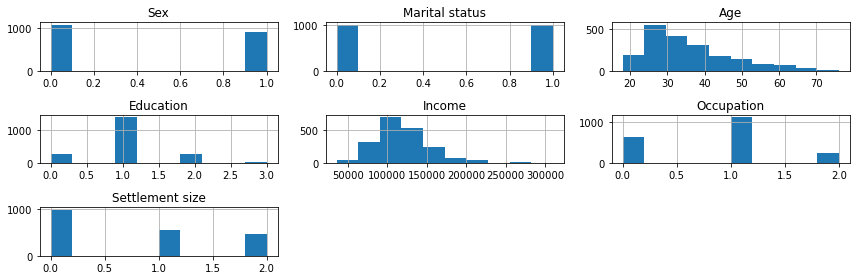

In [10]:
df_1.hist(figsize=(12, 4))
plt.tight_layout()

## Подготовка

### Масштабирование

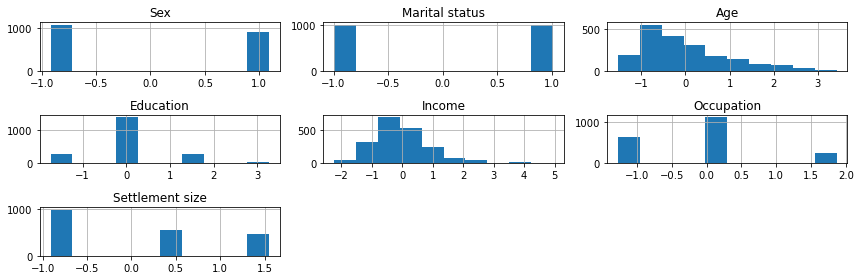

In [11]:
df_1_norm = pd.DataFrame(StandardScaler().fit_transform(df_1), columns=df_1.columns)
df_1_norm.hist(figsize=(12, 4))
plt.tight_layout()

### Полезные функции

In [12]:
def explained_variance_plot(pca_obj):
    features = range(pca_obj.n_components_)
    cumulative_sum = np.cumsum(pca_obj.explained_variance_ratio_)

    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.xticks(features)

    plt.bar(features, pca_obj.explained_variance_ratio_, align='center', label='Individual explained variance')
    plt.step(range(0,len(cumulative_sum)), cumulative_sum, where='mid',label='Cumulative explained variance')

    plt.legend(loc='best')
    plt.tight_layout()

In [13]:
%load_ext autotime

time: 275 µs (started: 2021-06-26 14:39:34 +03:00)


## Визуализация данных

### N-D PCA

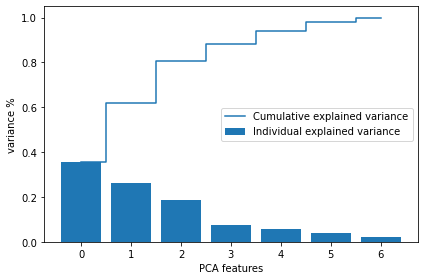

time: 227 ms (started: 2021-06-26 14:39:34 +03:00)


In [14]:
pca = PCA()
pca.fit(df_1_norm)
explained_variance_plot(pca)

### 3-D PCA

In [15]:
pca_3 = PCA(n_components=3)
df_1_pca_3 = pd.DataFrame(pca_3.fit_transform(df_1_norm))

time: 19.1 ms (started: 2021-06-26 14:39:34 +03:00)


In [21]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-55, elev=45)

ax.scatter(df_1_pca_3[0], df_1_pca_3[1], df_1_pca_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 38.6 ms (started: 2021-06-26 14:40:09 +03:00)


In [17]:
%matplotlib inline

time: 4.1 ms (started: 2021-06-26 14:39:34 +03:00)


### 3-D UMAP

In [18]:
umap_3 = UMAP(n_components=3)
df_1_umap_3 = pd.DataFrame(umap_3.fit_transform(df_1_norm))

time: 11.9 s (started: 2021-06-26 14:39:34 +03:00)


In [22]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-55, elev=45)

ax.scatter(df_1_umap_3[0], df_1_umap_3[1], df_1_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 41 ms (started: 2021-06-26 14:40:12 +03:00)


In [23]:
%matplotlib inline

time: 2.6 ms (started: 2021-06-26 14:40:15 +03:00)


## K-means

## DBSCAN